In [1]:
import pandas as pd
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gensim
import tqdm
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import gensim.corpora as corpora

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('snowball_data')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adiro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adiro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package snowball_data to
[nltk_data]     C:\Users\adiro\AppData\Roaming\nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!


True

In [2]:
stop_words = nltk.corpus.stopwords.words('english')

def tokenize_text_coherence(text):
    if isinstance(text, str):
        tokens = nltk.word_tokenize(text)
        tokens = [token.lower() for token in tokens if token not in string.punctuation]
        tokens = [token.replace("’", "") for token in tokens]
        tokens = [token.replace("'", "") for token in tokens]
        tokens = [token.replace("‘", "") for token in tokens]
        tokens = [token.replace("—", "") for token in tokens]
        tokens = [token.replace("”", "") for token in tokens]
        tokens = [token.replace("“", "") for token in tokens]
        tokens = [token.replace("–", "") for token in tokens]

        tokens = [token for token in tokens if not any(char.isdigit() for char in token)]


        tokens = [token for token in tokens if token not in stop_words]

        stemmer = nltk.stem.SnowballStemmer('english')
        tokens = [stemmer.stem(token) for token in tokens]
    else:
        tokens = []
    return tokens

def tokenize_text(text):
    if isinstance(text, str):
        tokens = nltk.word_tokenize(text)
        tokens = [token.lower() for token in tokens if token not in string.punctuation]
        tokens = [token.replace("’", "") for token in tokens]
        tokens = [token.replace("'", "") for token in tokens]
        tokens = [token.replace("‘", "") for token in tokens]
        tokens = [token.replace("—", "") for token in tokens]
        tokens = [token.replace("”", "") for token in tokens]
        tokens = [token.replace("“", "") for token in tokens]
        tokens = [token.replace("–", "") for token in tokens]

        tokens = [token for token in tokens if not any(char.isdigit() for char in token)]


        tokens = [token for token in tokens if token not in stop_words]

        stemmer = nltk.stem.SnowballStemmer('english')
        tokens = [stemmer.stem(token) for token in tokens]

        text = ' '.join(tokens)
    else:
        text = ''
    return text

In [3]:
file = pd.read_csv("new csv.csv")
file['Abstract Note'] = file['Abstract Note'].fillna('')

tokenized_data = file['Abstract Note'].apply(tokenize_text)
print(tokenized_data)

0      analysi data softwar develop organ reveal seve...
1                                                       
2      articl compar tradit requir engin approach agi...
3                                                       
4      find analyz document check requir import activ...
                             ...                        
592    paper investig two integ linear program model ...
593                                                     
594    requir engin softwar develop disciplin execut ...
595    context motiv softwar project today security-r...
596    requir priorit import activ softwar develop nu...
Name: Abstract Note, Length: 597, dtype: object


In [4]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(tokenized_data)

print(bag_of_words)

  (0, 142)	1
  (0, 746)	1
  (0, 2829)	2
  (0, 822)	3
  (0, 2110)	3
  (0, 2593)	1
  (0, 2753)	1
  (0, 83)	1
  (0, 2297)	1
  (0, 108)	1
  (0, 304)	1
  (0, 453)	2
  (0, 2454)	2
  (0, 456)	2
  (0, 388)	1
  (0, 1029)	1
  (0, 2095)	1
  (0, 3161)	1
  (0, 2564)	1
  (0, 1010)	1
  (0, 183)	1
  (0, 2079)	1
  (0, 1974)	1
  (0, 755)	1
  (0, 2563)	2
  :	:
  (596, 624)	1
  (596, 2347)	2
  (596, 815)	1
  (596, 2027)	1
  (596, 1370)	1
  (596, 2035)	1
  (596, 285)	1
  (596, 3148)	1
  (596, 1754)	1
  (596, 144)	1
  (596, 939)	1
  (596, 1902)	1
  (596, 1399)	1
  (596, 325)	1
  (596, 3179)	1
  (596, 227)	1
  (596, 89)	2
  (596, 3378)	2
  (596, 351)	1
  (596, 2852)	1
  (596, 1457)	1
  (596, 722)	2
  (596, 733)	1
  (596, 1380)	1
  (596, 375)	1


In [5]:
n_topics = 2
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(bag_of_words)

LatentDirichletAllocation(n_components=8, random_state=0)

In [6]:
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(", ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]))
    print()

Topic 0:
agil, softwar, develop, practic, project, method, use, engin, studi, process

Topic 1:
secur, requir, softwar, prioritis, techniqu, systemat, studi, use, research, engin

Topic 2:
requir, user, elicit, develop, engin, design, method, result, approach, need

Topic 3:
requir, process, elicit, softwar, use, system, develop, engin, stakehold, techniqu

Topic 4:
requir, test, case, use, model, prioritis, analysi, techniqu, problem, effect

Topic 5:
softwar, engin, system, requir, develop, product, team, practic, test, design

Topic 6:
project, requir, method, softwar, estim, use, develop, system, valu, agil

Topic 7:
requir, techniqu, elicit, softwar, knowledg, research, use, develop, review, engin



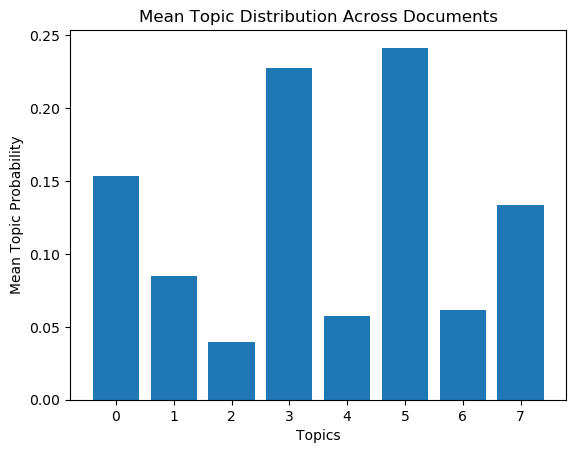

In [7]:
doc_term_matrix = vectorizer.transform(file["Abstract Note"]).toarray()
doc_topic = lda.transform(doc_term_matrix)

mean_topic_distribution = np.mean(doc_topic, axis=0)

# Create a bar chart of the topic distribution
fig, ax = plt.subplots()
ax.bar(range(n_topics), mean_topic_distribution, align='center')
ax.set_xticks(range(n_topics))
ax.set_xticklabels([str(i) for i in range(n_topics)])
ax.set_xlabel("Topics")
ax.set_ylabel("Mean Topic Probability")
plt.title("Mean Topic Distribution Across Documents")
plt.show()

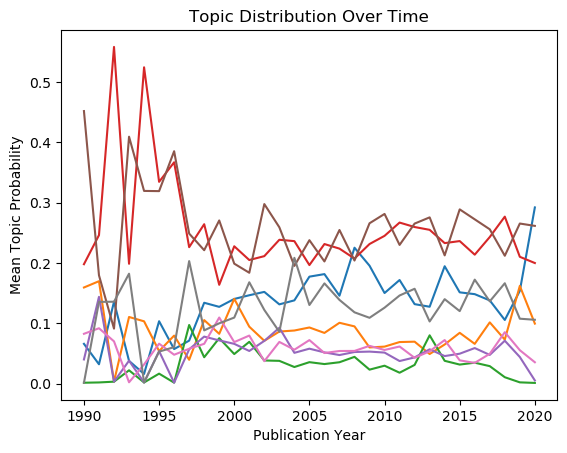

In [8]:
# Convert the Publication Year column to a pandas datetime object
file["Publication Year"] = pd.to_datetime(file["Publication Year"], format="%Y")

# Calculate the mean topic distribution for each year
yearly_topic_distribution = []
for year in range(int(file["Publication Year"].dt.year.min()), int(file["Publication Year"].dt.year.max()+1)):
    # Select the documents published in the current year
    docs_in_year = file[file["Publication Year"].dt.year == year]
    
    if len(docs_in_year) > 0:
        # Vectorize the abstracts for the documents in the current year
        doc_term_matrix = vectorizer.transform(docs_in_year["Abstract Note"])
        # Get the document-topic probabilities for the documents in the current year
        doc_topic = lda.transform(doc_term_matrix)
        # Calculate the mean topic distribution for the documents in the current year
        mean_topic_distribution = np.mean(doc_topic, axis=0)
        yearly_topic_distribution.append(mean_topic_distribution)

#print(yearly_topic_distribution)    

# Plot the yearly topic distribution as a time series
fig, ax = plt.subplots()
ax.plot(range(int(file["Publication Year"].dt.year.min()), int(file["Publication Year"].dt.year.max()-2)),
        yearly_topic_distribution)
ax.set_xlabel("Publication Year")
ax.set_ylabel("Mean Topic Probability")
plt.title("Topic Distribution Over Time")
plt.show()


In [9]:
tokenized_data_coherence = file['Abstract Note'].apply(tokenize_text_coherence)
# Create Dictionary
id2word = corpora.Dictionary(tokenized_data_coherence)

# Create Corpus
texts = tokenized_data_coherence

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [13]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=2, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=25,
                                       alpha=0.01,
                                       eta=0.01,
                                       per_word_topics=True)

In [15]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_data_coherence, dictionary=id2word, topn=2, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  -0.21362014713963168


In [13]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_data_coherence, dictionary=id2word, coherence='u_mass')
    
    return coherence_model_lda.get_coherence()

In [ ]:
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

In [3]:
df = pd.read_csv("lda_tuning_results (1).csv")
print(max(df['Coherence']))

-1.0730752788409526
